In [1]:
import ieeg_utilities as ieeg
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Linear correlation plot
ieeg.lin_corr(patient_id='ID07', time_begin=[32, 10], duration=float(5*60), t_lag=.3, critical_corr=0.4)

<Figure size 72x72 with 0 Axes>

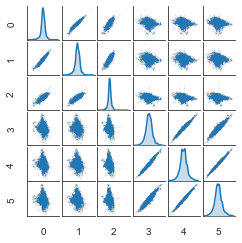

In [4]:
# Pairplot
patient_id = 'ID11'
time_begin = [60, 5]
duration = float(60)

# Load and prepare data
data_mat = loadmat('../data/' + patient_id + '_' + str(time_begin[0]) + 'h.mat')
info_mat = loadmat('../data/' + patient_id + '_info.mat')
fs = float(info_mat['fs'])
sample_begin = int(time_begin[1] * 60 * fs)
sample_end = sample_begin + int(duration * fs)
data_raw = data_mat['EEG'][[8, 9, 10, 20, 21, 22], sample_begin:sample_end].transpose()

df = pd.DataFrame(data_raw)

sns.set_style('white')
plt.figure(figsize=(1, 1))
g = sns.pairplot(df, diag_kind='kde', plot_kws={'s': .5, 'edgecolor':'none', 'alpha':.03})
g.fig.set_size_inches(3, 3)
g.set(xticklabels=[])
g.set(yticklabels=[])
plt.savefig('figures/fig_Ch2_DataAnalysis_pairplot.png', dpi=300)
plt.show()

In [2]:
# Nonlinear correlation generation
ieeg.nonlin_corr(patient_id='ID11', time_begin=[60, 5], duration=float(10), t_shift=.2, plot_name='final')

Computed columns: 19/20 | Time remaining [min]: 0.615


In [2]:
# Nonlinear corrleation plot only
h2 = np.load('../data/fc_ID11_60h5min_h2.npy')
r2 = np.load('../data/fc_ID11_60h5min_r2.npy')

ieeg.plot_nonlin_corr(r2=r2, h2=h2, save_name='final1')